# Análisis Experimental de Algoritmos
# Objetivo de experimento
1. Comparar la eficiencia de los algoritmos para resolver el problema de interés.

2. Comparar los resultados teóricos con los resultados experimentales.
---
Considere el problema de calcular el coeficiente binomial, suponiendo que 0≤k≤n.

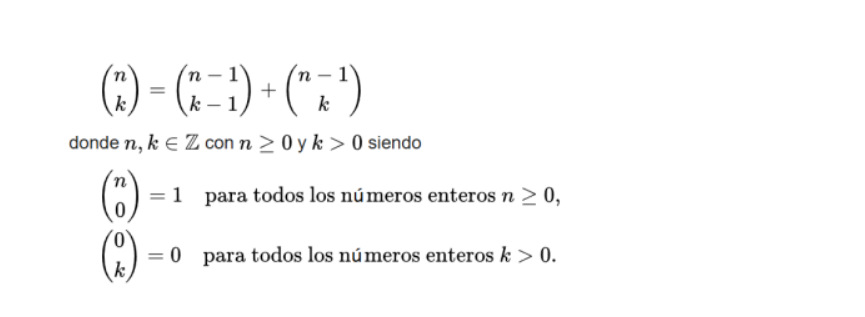
---
# Contexto del algoritmo
Los coeficientes binomiales, denotados como $\binom{n}{k}$ o C(n,k), representan el número de formas de seleccionar k elementos de un conjunto de n elementos sin importar el orden. Formalmente, para enteros no negativos n y k con $0 \leq k \leq n$, el coeficiente binomial se define como:

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

donde $n!$ denota el factorial de n. Por convención, $\binom{n}{0} = \binom{n}{n} = 1$ para $n \geq 0$. Estos coeficientes surgen de manera natural en el desarrollo del binomio de Newton, en combinatoria enumerativa y en teoría de probabilidad, constituyendo un concepto fundamental en matemáticas discretas con aplicaciones en diversos campos algorítmicos y computacionales.




## Importar librerias necesarias para la manipulación de datos, arreglos, matrices, gráficos, tiempo.

In [ ]:
from itertools import combinations

import math
import random
import time
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Algoritmo de fuerza bruta con itertools


### Análisis de complejidad algorítmica

1. **Complejidad temporal**:
   - La función `brute_force_itertools` tiene una complejidad temporal de $O\binom{n}{k}$, es decir $O\left(\frac{n!}{k!(n-k)!}\right)$, debido a que genera todas las combinaciones posibles.
   - Esto explica por qué se han omitido los tamaños 'L' en el código, ya que los cálculos serían prohibitivamente lentos para valores grandes.

2. **Complejidad espacial**:
   - La función utiliza $O(k)$ de espacio adicional para cada combinación generada por `itertools.combinations`.
   - Aunque sólo mantiene un contador y descarta las combinaciones específicas, `itertools` debe generar temporalmente cada combinación.

### Uso de memoria

- El enfoque actual es relativamente eficiente en memoria ya que no almacena todas las combinaciones, solo las cuenta.
- Sin embargo, `itertools.combinations` genera internamente todas las combinaciones, lo que puede consumir recursos temporales significativos para valores grandes de $n$ y $k$.

In [ ]:
"""Uso de la libreria de itertools encontrar todas las combinaciones posibles y guardarlas en un contador"""
def brute_force_itertools(n, k):
  count = 0
  for _ in combinations(range(n), k):
    count += 1
  return count

"""Función para medir y registrar métricas de rendimiento"""
def results_brute_force_itertools():

  # diccionario donde se guardaran todos los resultados
  results = {}

  # Definimos tamaños de las entradas según el caso [ [valores n], [valores k] ]
  sizes = {
    'XS': [[1, 10], [2, 5]],
    'S': [[11, 20], [7, 10]],
    'M': [[21, 30], [12, 15]],
    #'L': [[31, 40], [17, 20]] # Se omite el tamaño L por la complejidad y cantidad de tiempo para calcular los coeficientes entre esos rangos
  }

  # Extraemos los valores de cada llave del diccionario para iterarlo cada combinación
  for size, ranges in sizes.items():

    # Rangos para n y k
    range_n = ranges[0] # Primer elemento de values para (n) en cada peso.  --> XS = [1, 10] | S = [11, 20] | M = [21, 30] | L = [31, 40]
    range_k = ranges[1] # Segundo elemento de values para (k) en cada peso. --> XS = [2, 5]] | S = [7, 10]  | M = [12, 15] | L = [17, 20]

    results[size] = []

    for i in range(range_n[0], range_n[1] + 1): # for que itera desde el primer elemento de range_n hasta el ultimo
      for k in range(range_k[0], range_k[1] + 1): # for que itera desde el primer elemento de range_k hasta el ultimo

        # definimos nuestro n y k para el coeficiente binomial a calcular
        n = i
        k = k
        # definimos la combinación en una tupla
        combination = (n, k)
        print(f"Size {size} Combinación: {combination}")

        # Calculamos el tiempo de ejecución de la función 'binomial'
        start_time = time.time()
        result = brute_force_itertools(n, k) # Se invoca la función que realiza todo el proceso de calcular el coeficiente binomial recursivamente
        end_time = time.time()

        # definimos los tiempos de cada combinacion
        time_executed = end_time - start_time

        # Asignamos las métricas en un diccionario
        dictionary = {
          '_Combination': combination,
          '_Number_of_combinations': result,
          '_Execution_time': round(time_executed, 4)
        }
        # Guardamos cada combinacion como un diccionario y luego lo guardamos en una lista de diccionarios
        results[size].append(dictionary)
        print(f"Número de combinaciones: {result}, Tiempo de ejecución: {time_executed}")
        print()
  return results

In [ ]:
results_itertools = results_brute_force_itertools()

weights_keys = list(results_itertools.keys()) # Obtenemos la lista de claves de pesos (por ejemplo, ['XS', 'S', 'M', 'L'])

# Asignamos el número de filas
n_rows = len(results_itertools[weights_keys[0]])

# Creamos la lista de nombres de columnas.
field_names = []
for size in weights_keys:
  field_names.extend([
    f"{size}_Combination",
    f"{size}_Number_of_combinations",
    f"{size}_Execution_time"
  ])

# Abrimos el archivo CSV para escritura y construimos cada fila
with open('itertools_results.csv', mode = 'w', newline = '') as file:
  writer_itertools = csv.DictWriter(file, fieldnames = field_names)
  writer_itertools.writeheader()

  # Recorremos el índice de cada fila
  for i in range(n_rows):
    row = {}
    # Para cada peso, obtenemos la fila correspondiente a la posición i
    for size in weights_keys:
      metric = results_itertools[size][i]
      row[f"{size}_Combination"] = metric["_Combination"]
      row[f"{size}_Number_of_combinations"] = metric["_Number_of_combinations"]
      row[f"{size}_Execution_time"] = metric["_Execution_time"]

    writer_itertools.writerow(row)

Size XS Combinación: (1, 2)
Número de combinaciones: 0, Tiempo de ejecución: 4.76837158203125e-06

Size XS Combinación: (1, 3)
Número de combinaciones: 0, Tiempo de ejecución: 1.6689300537109375e-06

Size XS Combinación: (1, 4)
Número de combinaciones: 0, Tiempo de ejecución: 1.1920928955078125e-06

Size XS Combinación: (1, 5)
Número de combinaciones: 0, Tiempo de ejecución: 7.152557373046875e-07

Size XS Combinación: (2, 2)
Número de combinaciones: 1, Tiempo de ejecución: 1.6689300537109375e-06

Size XS Combinación: (2, 3)
Número de combinaciones: 0, Tiempo de ejecución: 1.6689300537109375e-06

Size XS Combinación: (2, 4)
Número de combinaciones: 0, Tiempo de ejecución: 3.0994415283203125e-06

Size XS Combinación: (2, 5)
Número de combinaciones: 0, Tiempo de ejecución: 9.5367431640625e-07

Size XS Combinación: (3, 2)
Número de combinaciones: 3, Tiempo de ejecución: 1.430511474609375e-06

Size XS Combinación: (3, 3)
Número de combinaciones: 1, Tiempo de ejecución: 9.5367431640625e-07



KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('itertools_results.csv')
df.head()

,XS_Combination,XS_Number_of_combinations,XS_Execution_time,S_Combination,S_Number_of_combinations,S_Execution_time,M_Combination,M_Number_of_combinations,M_Execution_time
0,"(1, 2)",0,0.0,"(11, 7)",330,0.0000,"(21, 12)",293930,0.0238
1,"(1, 3)",0,0.0,"(11, 8)",165,0.0000,"(21, 13)",203490,0.0168
2,"(1, 4)",0,0.0,"(11, 9)",55,0.0000,"(21, 14)",116280,0.0099
3,"(1, 5)",0,0.0,"(11, 10)",11,0.0000,"(21, 15)",54264,0.0056
4,"(2, 2)",1,0.0,"(12, 7)",792,0.0001,"(22, 12)",646646,0.0541


## Algoritmo Divide y venceras con fórmula recursiva


### Análisis de complejidad algorítmica

1. **Complejidad temporal**:
   - La función `divide_and_conquer_recursive` tiene una complejidad temporal de $O(2^n)$ debido a que cada llamada recursiva genera dos llamadas adicionales sin memorización.
   - Esta implementación es significativamente menos eficiente que el enfoque de fuerza bruta para valores grandes de $n$ y $k$.
   - Al igual que en el algoritmo anterior, se omite el tamaño 'L' en el código porque los cálculos serían extremadamente lentos debido a la naturaleza exponencial del algoritmo.

2. **Complejidad espacial**:
   - La función utiliza $O(n)$ de espacio adicional debido a la pila de llamadas recursivas, que puede alcanzar una profundidad máxima de $n$.
   - Cada llamada recursiva añade un marco a la pila, lo que puede llevar a un desbordamiento de pila para valores grandes de $n$.

### Uso de memoria

- Este enfoque consume una cantidad significativa de memoria debido a la naturaleza de la recursión, especialmente para valores grandes de entrada.
- El algoritmo recalcula repetidamente los mismos subproblemas, lo que resulta en una gran cantidad de llamadas recursivas redundantes.
- Una misma combinación $(n, k)$ puede ser calculada múltiples veces durante la ejecución, lo que provoca un uso ineficiente tanto de CPU como de memoria.


In [ ]:
"""Funcion que calcula el numero de coeficientes binomiales (n, k) mediante una forma recursiva"""
def divide_and_conquer_recursive(n, k):
  # Definimos Casos base
  if (n == 0 and k == 0) or (n != 0 and k == 0) or (n == k):
    return 1
  if n == 0 and k != 0:
    return 0

  # Definimos la formula recursiva
  return divide_and_conquer_recursive(n - 1, k - 1) + divide_and_conquer_recursive(n - 1, k)

In [ ]:
"""Funcion donde se experimenta con diferentes tamaños de entradas, tiempos de ejecución  y número de combinaciones"""
def results_divide_and_conquer():

  # diccionario donde se guardaran todos los resultados
  results = {}

  # Definimos tamaños de las entradas según el caso [ [valores n], [valores k] ]
  weights = {
    'XS': [[1, 10], [2, 5]],
    'S': [[11, 20], [7, 10]],
    'M': [[21, 30], [12, 15]],
    #'L': [[31, 40], [17, 20]] # Se omite el tamaño L por la complejidad y cantidad de tiempo para calcular los coeficientes entre esos rangos
  }

  # Extraemos los valores de cada llave del diccionario para iterarlo cada combinación
  for weight, ranges in weights.items():

    # Rangos para n y k
    range_n = ranges[0] # Primer elemento de values para (n) en cada peso.  --> XS = [1, 10] | S = [11, 20] | M = [21, 30] | L = [31, 40]
    range_k = ranges[1] # Segundo elemento de values para (k) en cada peso. --> XS = [2, 5]] | S = [7, 10]  | M = [12, 15] | L = [17, 20]

    results[weight] = []

    for i in range(range_n[0], range_n[1] + 1): # for que itera desde el primer elemento de range_n hasta el ultimo
      for k in range(range_k[0], range_k[1] + 1): # for que itera desde el primer elemento de range_k hasta el ultimo

        # definimos nuestro n y k para el coeficiente binomial a calcular
        n = i
        k = k
        # definimos la combinación en una tupla
        combination = (n, k)
        print(f"Weight {weight} Combinación: {combination}")

        # Calculamos el tiempo de ejecución de la función 'binomial'
        start_time = time.time()
        result = divide_and_conquer_recursive(n, k) # Se invoca la función que realiza todo el proceso de calcular el coeficiente binomial recursivamente
        end_time = time.time()

        # definimos los tiempos de cada combinacion
        time_executed = end_time - start_time

        # Asignamos las métricas en un diccionario
        dictionary = {
          '_Combination': combination,
          '_Number_of_combinations': result,
          '_Execution_time': round(time_executed, 4)
        }
        # Guardamos cada combinacion como un diccionario y luego lo guardamos en una lista de diccionarios
        results[weight].append(dictionary)
        print(f"Número de combinaciones: {result}, Tiempo de ejecución: {time_executed}")
        print()
  return results

#### Se crea un archivo csv para manejarlo con pandas y poder graficar con matplotlib

In [ ]:
all_results = results_divide_and_conquer()

weights_keys = list(all_results.keys()) # Obtenemos la lista de claves de pesos (por ejemplo, ['XS', 'S', 'M', 'L'])

# Asignamos el número de filas
n_rows = len(all_results[weights_keys[0]])

# Creamos la lista de nombres de columnas.
field_names = []
for weight in weights_keys:
  field_names.extend([
    f"{weight}_Combination",
    f"{weight}_Number_of_combinations",
    f"{weight}_Execution_time"
  ])

# Abrimos el archivo CSV para escritura y construimos cada fila
with open('divide_conquer_results.csv', mode = 'w', newline = '') as file:
  writer = csv.DictWriter(file, fieldnames = field_names)
  writer.writeheader()

  # Recorremos el índice de cada fila
  for i in range(n_rows):
    row = {}
    # Para cada peso, obtenemos la fila correspondiente a la posición i
    for weight in weights_keys:
      metric = all_results[weight][i]
      row[f"{weight}_Combination"] = metric["_Combination"]
      row[f"{weight}_Number_of_combinations"] = metric["_Number_of_combinations"]
      row[f"{weight}_Execution_time"] = metric["_Execution_time"]

    writer.writerow(row)

Weight XS Combinación: (1, 2)
Número de combinaciones: 0, Tiempo de ejecución: 4.291534423828125e-06

Weight XS Combinación: (1, 3)
Número de combinaciones: 0, Tiempo de ejecución: 1.6689300537109375e-06

Weight XS Combinación: (1, 4)
Número de combinaciones: 0, Tiempo de ejecución: 3.337860107421875e-06

Weight XS Combinación: (1, 5)
Número de combinaciones: 0, Tiempo de ejecución: 1.430511474609375e-06

Weight XS Combinación: (2, 2)
Número de combinaciones: 1, Tiempo de ejecución: 4.76837158203125e-07

Weight XS Combinación: (2, 3)
Número de combinaciones: 0, Tiempo de ejecución: 1.6689300537109375e-06

Weight XS Combinación: (2, 4)
Número de combinaciones: 0, Tiempo de ejecución: 1.430511474609375e-06

Weight XS Combinación: (2, 5)
Número de combinaciones: 0, Tiempo de ejecución: 1.1920928955078125e-06

Weight XS Combinación: (3, 2)
Número de combinaciones: 3, Tiempo de ejecución: 1.1920928955078125e-06

Weight XS Combinación: (3, 3)
Número de combinaciones: 1, Tiempo de ejecución: 

### Gráficos comparativos entre los diferentes tamaño de entrada (XS, S, M)
En las 3 categorias se tiene lo siguiente:
- Combinaciones.
- Número de combinaciones.
- Tiempo de ejecución.

#### Creacion del dataframe usando el csv creado anteriormente

In [ ]:
# Creamos nuestro dataset con el conjunto de datos generado
df_2 = pd.read_csv('divide_conquer_results.csv')
df_2.head()

,XS_Combination,XS_Number_of_combinations,XS_Execution_time,S_Combination,S_Number_of_combinations,S_Execution_time,M_Combination,M_Number_of_combinations,M_Execution_time
0,"(1, 2)",0,0.0,"(11, 7)",330,0.0001,"(21, 12)",293930,0.0668
1,"(1, 3)",0,0.0,"(11, 8)",165,0.0000,"(21, 13)",203490,0.0463
2,"(1, 4)",0,0.0,"(11, 9)",55,0.0000,"(21, 14)",116280,0.0253
3,"(1, 5)",0,0.0,"(11, 10)",11,0.0000,"(21, 15)",54264,0.0137
4,"(2, 2)",1,0.0,"(12, 7)",792,0.0002,"(22, 12)",646646,0.1607


#### Gráfico individual y en conjunto para cada tamaño (XS, S, M)


In [ ]:
"""Función para crear visualizaciones las combinaciones y el numero de combinaciones"""
def metrics_combination_vs_number_combinations(df):
  figure, ax = plt.subplots(3, 1, figsize=(10, 12))

  # Primer subplot (XS)
  ax[0].plot(df['XS_Combination'], df['XS_Number_of_combinations'], marker = 'o', markersize = 7, linestyle = '-', c = 'red', mec = 'darkolivegreen')
  ax[0].set_title('Combinaciones vs Número de combinaciones (XS)', fontsize = 10, fontweight = 'bold')
  ax[0].set_xlabel('Combinaciones', fontsize = 10)
  ax[0].set_ylabel('# de combinaciones', fontsize = 10)

  ax[0].set_xticks(range(len(df['XS_Combination'])))
  ax[0].set_xticklabels(df['XS_Combination'], rotation = 90, fontsize = 6)

  # Segundo subplot (S)
  ax[1].plot(df['S_Combination'], df['S_Number_of_combinations'], marker = 'o', markersize = 7, linestyle = '-', c = 'olive', mec = 'darkolivegreen')
  ax[1].set_title('Combinaciones vs Número de combinaciones (S)', fontsize = 10, fontweight = 'bold')
  ax[1].set_xlabel('Combinaciones', fontsize = 10)
  ax[1].set_ylabel('# de combinaciones', fontsize = 10)

  ax[1].set_xticks(range(len(df['S_Combination'])))
  ax[1].set_xticklabels(df['S_Combination'], rotation = 90, fontsize = 6)

  # Tercer subplot (M)
  ax[2].plot(df['M_Combination'], df['M_Number_of_combinations'], marker = 'o', markersize = 7, linestyle = '-', c = 'blue', mec = 'darkolivegreen')
  ax[2].set_title('Combinaciones vs Número de combinaciones (M)', fontsize = 10, fontweight = 'bold')
  ax[2].set_xlabel('Combinaciones', fontsize = 10)
  ax[2].set_ylabel('# de combinaciones', fontsize = 10)

  ax[2].set_xticks(range(len(df['M_Combination'])))
  ax[2].set_xticklabels(df['M_Combination'], rotation = 90, fontsize = 6)

  # Escala logarítmica y rejilla en cada eje
  for axis in ax:
      axis.set_yscale('log') # Colocamos el eje y en escala logarítmica por la cantidad elevada de combinaciones mas que todo en el tamaño M
      axis.grid(True)

  plt.subplots_adjust(hspace=0.5)
  plt.show()

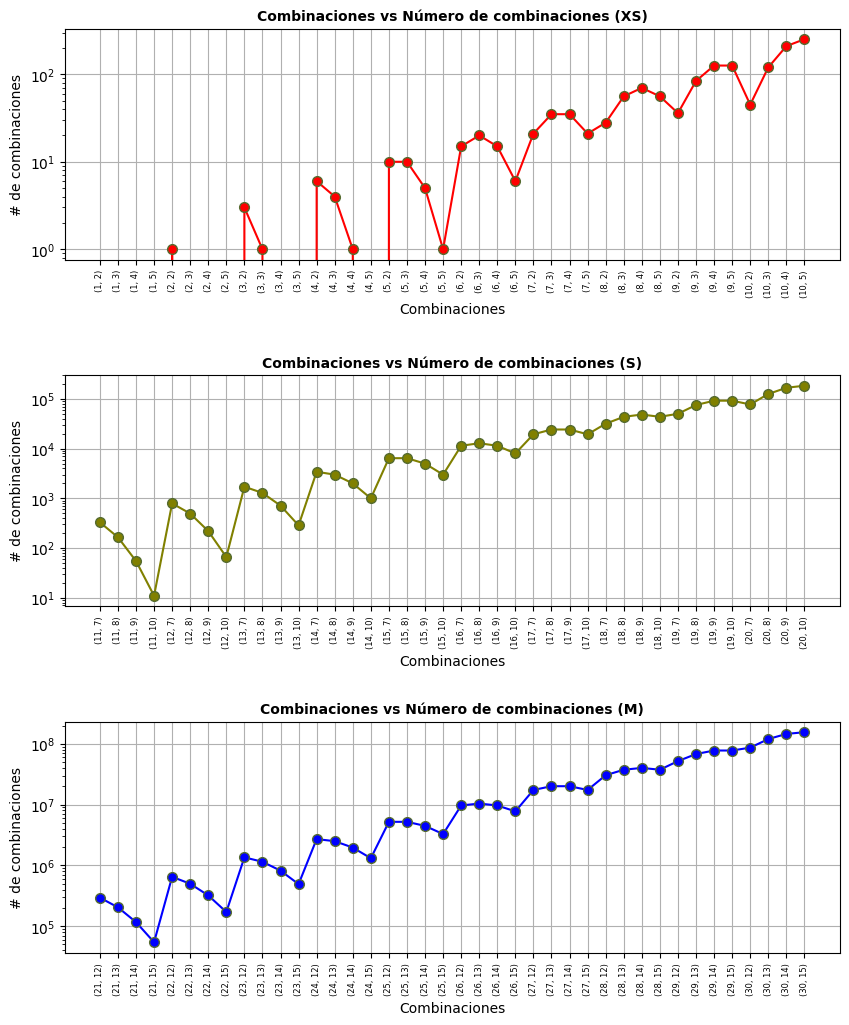

In [ ]:
"""Vizualizamos las métricas de cada tamaño (XS, S, M) en función de las combinaciones y el número de combinaciones"""
metrics_combination_vs_number_combinations(df_2)

In [ ]:
""" Gráfico general combinando los 3 tamaños (XS, S, M) """
def metrics_combinated(df):
  plt.figure(figsize=(10, 6), dpi = 115)

  plt.plot(df['XS_Combination'], df['XS_Number_of_combinations'], marker='o', markersize = 7,  linestyle='-', c = 'red', mec = 'darkolivegreen' )
  plt.plot(df['S_Combination'], df['S_Number_of_combinations'], marker='o', markersize = 7,  linestyle='-', c = 'olive', mec = 'darkolivegreen' )
  plt.plot(df['M_Combination'], df['M_Number_of_combinations'], marker='o', markersize = 7,  linestyle='-', c = 'blue', mec = 'darkolivegreen' )

  plt.title('Combinaciones vs Número de combinaciones', fontsize =18, fontweight = 'bold')
  plt.xlabel('Combinaciones', fontsize = 14)
  plt.ylabel('Número de combinaciones', fontsize = 14)

  plt.xticks(range(0, 120, 3), rotation=90, fontsize = 10)
  plt.yticks(fontsize = 12)
  plt.legend(['XS', 'S', 'M'])
  plt.yscale('log')

  plt.show()

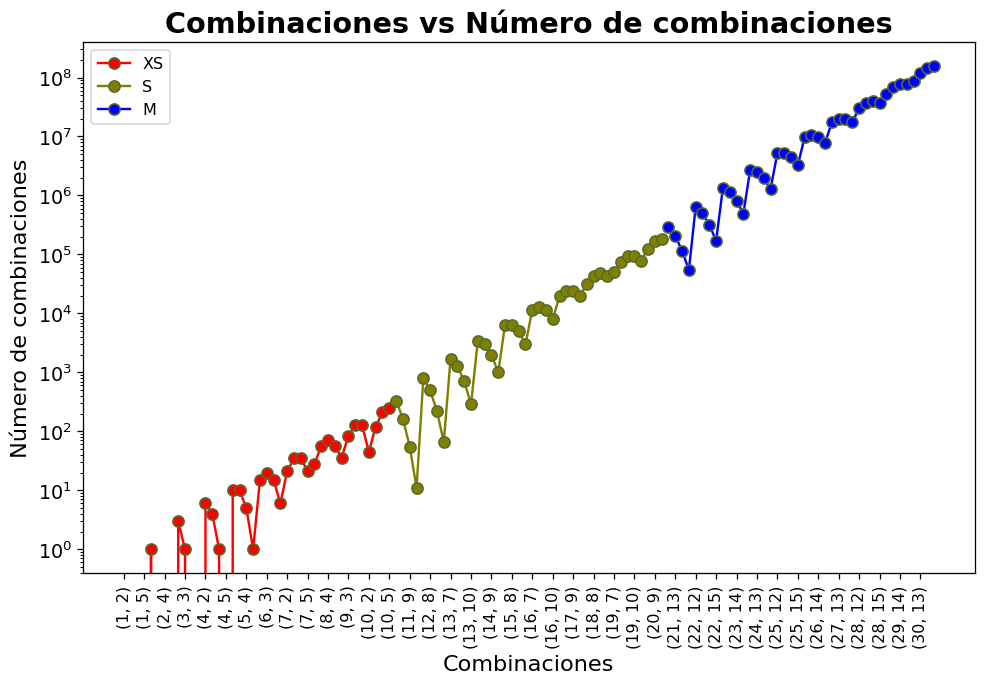

In [ ]:
metrics_combinated(df_2)

### Gráfico comparativo entre las combinaciones y el tiempo de ejecución para cada tamaño (XS, S, M)

In [ ]:
def metrics_combination_vs_time(df):
  figure, ax = plt.subplots(3, 1, figsize=(10, 12))

  # Primer subplot (XS)
  ax[0].plot(df['XS_Combination'], df['XS_Execution_time'], marker='o', markersize=7, linestyle='-', c='red', mec='darkolivegreen')

  ax[0].set_title('Combinaciones vs Tiempo de ejecución (XS)', fontsize=10, fontweight='bold')
  ax[0].set_xlabel('Combinaciones', fontsize=10)
  ax[0].set_ylabel('Tiempo de ejecución (segundos)', fontsize=10)

  ax[0].set_xticks(range(len(df['XS_Combination'])))
  ax[0].set_xticklabels(df['XS_Combination'], rotation=90, fontsize=6)

  # Segundo subplot (S)
  ax[1].plot(df['S_Combination'], df['S_Execution_time'], marker='o', markersize=7, linestyle='-', c='olive', mec='darkolivegreen')

  ax[1].set_title('Combinaciones vs Tiempo de ejecución (S)', fontsize=10, fontweight='bold')
  ax[1].set_xlabel('Combinaciones', fontsize=10)
  ax[1].set_ylabel('Tiempo de ejecución (segundos)', fontsize=10)

  ax[1].set_xticks(range(len(df['S_Combination'])))
  ax[1].set_xticklabels(df['S_Combination'], rotation=90, fontsize=6)

  # Tercer subplot (M)
  ax[2].plot(df['M_Combination'], df['M_Execution_time'], marker='o', markersize=7, linestyle='-', c='blue', mec='darkolivegreen')

  ax[2].set_title('Combinaciones vs Tiempo de ejecución (M)', fontsize=10, fontweight='bold')
  ax[2].set_xlabel('Combinaciones', fontsize=10)
  ax[2].set_ylabel('Tiempo de ejecución (segundos)', fontsize=10)

  ax[2].set_xticks(range(len(df['M_Combination'])))
  ax[2].set_xticklabels(df['M_Combination'], rotation=90, fontsize=6)

  #rejilla en cada eje
  for axis in ax:
    # Se omite la escala en eje y se deja por defecto 'lineal' ya que los tiempos de ejecución no son números grandes
      axis.grid(True)

  plt.subplots_adjust(hspace=0.5)
  plt.show()

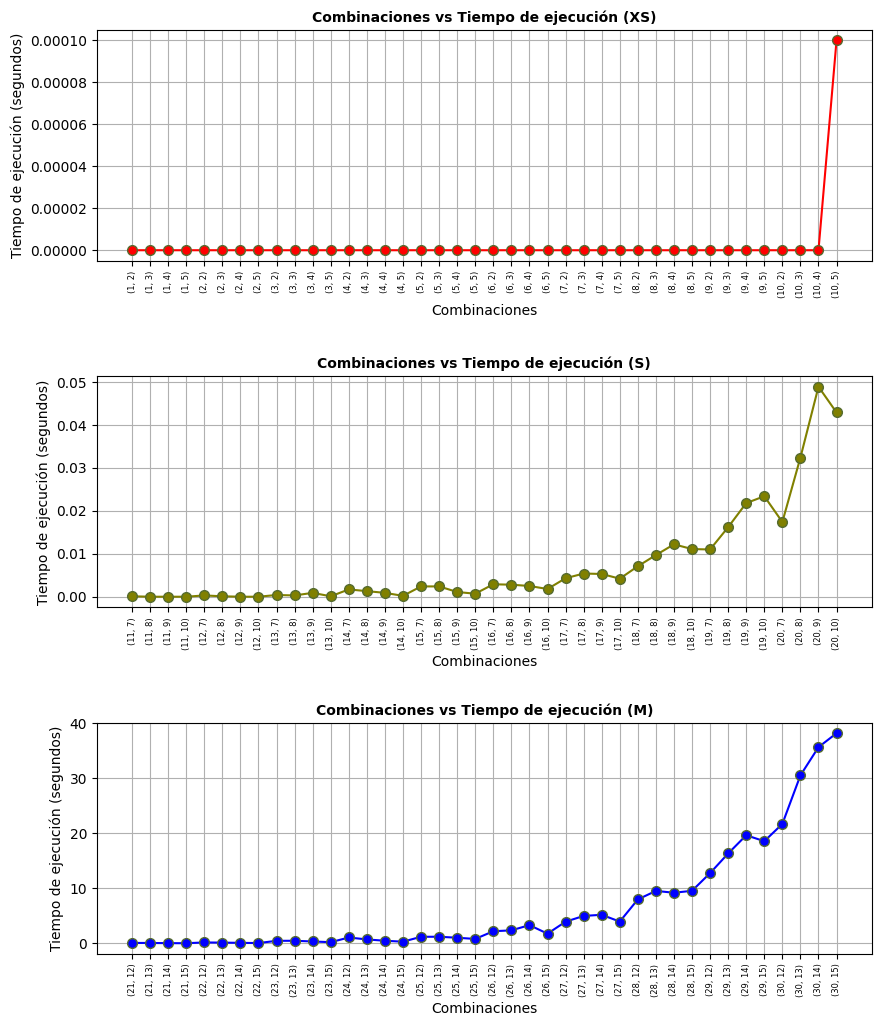

In [ ]:
metrics_combination_vs_time(df_2)

In [ ]:
def metrics_combinated_time(df):
  plt.figure(figsize=(10, 6), dpi = 115)
  plt.plot(df['XS_Combination'], df['XS_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'red', mec = 'darkolivegreen' )
  plt.plot(df['S_Combination'], df['S_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'olive', mec = 'darkolivegreen' )
  plt.plot(df['M_Combination'], df['M_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'blue', mec = 'darkolivegreen' )

  plt.title('Combinaciones vs Tiempo de ejecucion', fontsize =18, fontweight = 'bold')
  plt.xlabel('Combinaciones', fontsize = 14)
  plt.ylabel('Tiempo de ejecuion (segundos)', fontsize = 14)

  plt.xticks(range(0, 120, 5), rotation=90, fontsize = 10)
  plt.yticks(fontsize = 12)
  plt.legend(['XS', 'S', 'M'])

  plt.grid(True)
  plt.show()

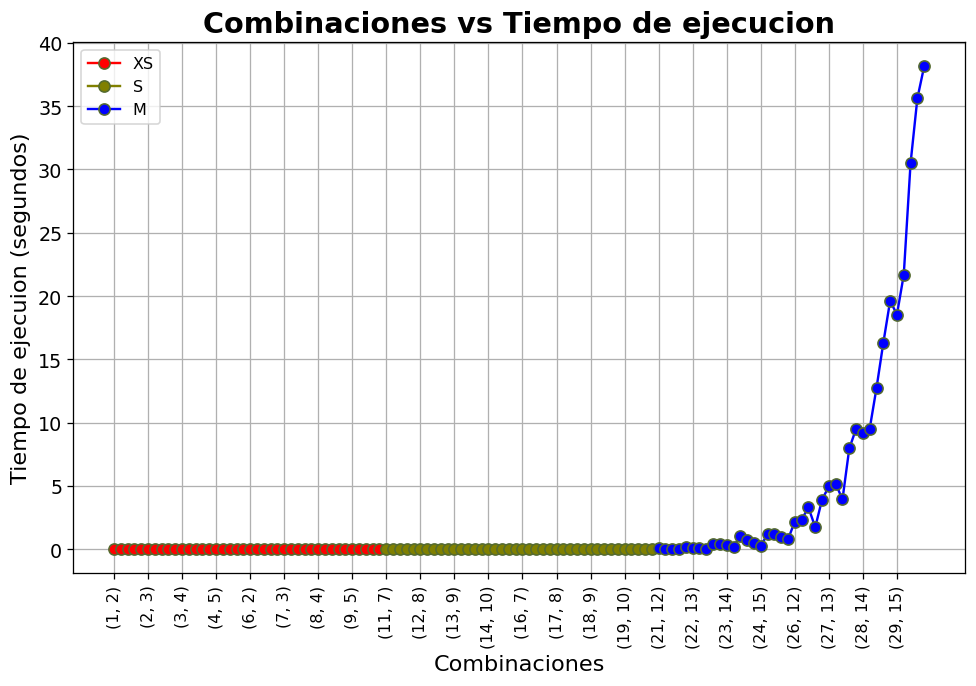

In [ ]:
metrics_combinated_time(df_2)

## Algoritmo Divide y venceras con memorización

### Complejidad Temporal: $\mathcal{O}(n \cdot k)$

La función `divide_memo(n, k)` calcula el coeficiente binomial $\binom{n}{k}$ usando **memoización**, lo que mejora significativamente la eficiencia comparado con la versión puramente recursiva.

---

**1. Eliminación de cálculos redundantes:**  
A diferencia del algoritmo anterior, cada subproblema $(n, k)$ se calcula exactamente una vez y se almacena en el diccionario `memo`.

**2. Número total de subproblemas:**  
Existen aproximadamente $n \cdot k$ posibles pares $(n, k)$ que podrían calcularse durante la ejecución.

**3. Rango de valores:**  
- El valor de $n$ puede variar desde $0$ hasta el $n$ original.  
- El valor de $k$ puede variar desde $0$ hasta el mínimo entre $k$ original y $n$.

**4. Coste por subproblema:** Cada cálculo de un nuevo subproblema $(n,k)$ involucra:
- Verificar si el resultado ya existe en el diccionario: $\mathcal{O}(1)$  
- Realizar operaciones aritméticas simples: $\mathcal{O}(1)$  
- Almacenar el resultado en el diccionario: $\mathcal{O}(1)$

---

### Complejidad Espacial: $\mathcal{O}(n \cdot k)$

La complejidad espacial incluye tanto la memoria para la pila de recursión como la memoria para almacenar resultados intermedios:

**1. Diccionario de memoización:**  
El diccionario `memo` almacena los resultados de todos los subproblemas calculados. En el peor caso, almacenará $\mathcal{O}(n \cdot k)$ entradas, una por cada par $(n,k)$ único.

**2. Pila de recursión:**  
Aunque la recursión sigue presente, la profundidad máxima de la pila es $\mathcal{O}(n)$ (similar al algoritmo anterior).  
Sin embargo, gracias a la memoización, muchas ramas del árbol de recursión se cortan temprano.


In [ ]:
memo = {}
# Funcion que calcula el numero de coeficientes binomiales (n, k)
def divide_memo(n, k):

  # Si el coeficiente binomial ya fue calculado, retornamos el valor guardado en el diccionario
  if (n, k) in memo:
    return memo[(n, k)]

  # Definimos Casos base
  if k > n:
    memo[(n, k)] = 0
    return 0

  if k == 0 or k == n:
    memo[(n, k)] = 1
    return 1

  # Definimos la formula recursiva y guardamos el resultado en la variable 'result'
  result = divide_memo(n - 1, k - 1) + divide_memo(n - 1, k)
  memo[(n, k)] = result

  return result

In [ ]:
memo = {}
# Funcion que calcula el numero de coeficientes binomiales (n, k)
def divide_memo(n, k):

  # Si el coeficiente binomial ya fue calculado, retornamos el valor guardado en el diccionario
  if (n, k) in memo:
    return memo[(n, k)]

  # Definimos Casos base
  if k > n:
    memo[(n, k)] = 0
    return 0

  if k == 0 or k == n:
    memo[(n, k)] = 1
    return 1

  # Definimos la formula recursiva y guardamos el resultado en la variable 'result'
  result = divide_memo(n - 1, k - 1) + divide_memo(n - 1, k)
  memo[(n, k)] = result

  return result

"""Funcion donde se experimenta con diferentes tamaños de entradas, tiempos de ejecución  y número de combinaciones"""
def results_divide_memo():

  # diccionario donde se guardaran todos los resultados
  results = {}
  # Definimos tamaños de las entradas según el caso [ [valores n], [valores k] ]
  weights = {
    'XS': [[1, 10], [2, 5]],
    'S': [[11, 20], [7, 10]],
    'M': [[21, 30], [12, 15]],
    'L': [[31, 40], [17, 20]],
    'XL': [[41, 50], [22, 25]],
    'XXL': [[51, 60], [32, 35]]
  }

  # Extraemos los valores de cada llave del diccionario para iterarlo cada combinación
  for weight, ranges in weights.items():

    # Rangos para n y k
    range_n = ranges[0] # Primer elemento de values para (n) en cada peso.  --> XS = [1, 10] | S = [11, 20] | M = [21, 30] | L = [31, 40]
    range_k = ranges[1] # Segundo elemento de values para (k) en cada peso. --> XS = [2, 5]] | S = [7, 10]  | M = [12, 15] | L = [17, 20]


    results[weight] = []

    for i in range(range_n[0], range_n[1] + 1): # for que itera desde el primer elemento de range_n hasta el ultimo
      for k in range(range_k[0], range_k[1] + 1): # for que itera desde el primer elemento de range_k hasta el ultimo

        # definimos nuestro n y k para el coeficiente binomial a calcular
        n = i
        k = k

        # definimos la combinación en una tupla
        combination = (n, k)
        print(f"Weight {weight} Combinación: {combination}")

        # Calculamos el tiempo de ejecución de la función 'binomial'
        start_time = time.time()
        result = divide_memo(n, k) # Se invoca la función que realiza todo el proceso de calcular el coeficiente binomial recursivamente
        end_time = time.time()

        # definimos los tiempos de cada combinacion
        time_executed = end_time - start_time

        # Asignamos las métricas en un diccionario
        dictionary = {
          '_Combination': combination,
          '_Number_of_combinations': result,
          '_Execution_time': round(time_executed, 4)
        }
        # Guardamos cada combinacion como un diccionario y luego lo guardamos en una lista de diccionarios
        results[weight].append(dictionary)
        print(f"Número de combinaciones: {result}, Tiempo de ejecución: {time_executed}")
        print()
  return results

In [ ]:
all_results_memo = results_divide_memo()
# Obtenemos la lista de claves de pesos (por ejemplo, ['XS', 'S', 'M', 'L'])
weights_keys_memo = list(all_results_memo.keys())

# Asignamos el número de filas
n_rows_memo = len(all_results_memo[weights_keys_memo[0]])

# Creamos la lista de nombres de columnas.
field_names_memo = []
for weight_memo in weights_keys_memo:
  field_names_memo.extend([
    f"{weight_memo}_Combination",
    f"{weight_memo}_Number_of_combinations",
    f"{weight_memo}_Execution_time"
  ])

# Abrimos el archivo CSV para escritura y construimos cada fila
with open('divide_results_memo.csv', mode = 'w', newline = '') as file:
  writer_memo = csv.DictWriter(file, fieldnames = field_names_memo)
  writer_memo.writeheader()

  # Recorremos el índice de cada registro (fila)
  for i in range(n_rows_memo):
    row_memo = {}
    # Para cada peso, obtenemos el registro correspondiente a la posición i
    for weight_memo in weights_keys_memo:
      metric_memo = all_results_memo[weight_memo][i]
      row_memo[f"{weight_memo}_Combination"] = metric_memo["_Combination"]
      row_memo[f"{weight_memo}_Number_of_combinations"] = metric_memo["_Number_of_combinations"]
      row_memo[f"{weight_memo}_Execution_time"] = metric_memo["_Execution_time"]

    writer_memo.writerow(row_memo)

Weight XS Combinación: (1, 2)
Número de combinaciones: 0, Tiempo de ejecución: 4.76837158203125e-06

Weight XS Combinación: (1, 3)
Número de combinaciones: 0, Tiempo de ejecución: 1.1920928955078125e-06

Weight XS Combinación: (1, 4)
Número de combinaciones: 0, Tiempo de ejecución: 1.1920928955078125e-06

Weight XS Combinación: (1, 5)
Número de combinaciones: 0, Tiempo de ejecución: 9.5367431640625e-07

Weight XS Combinación: (2, 2)
Número de combinaciones: 1, Tiempo de ejecución: 1.6689300537109375e-06

Weight XS Combinación: (2, 3)
Número de combinaciones: 0, Tiempo de ejecución: 1.430511474609375e-06

Weight XS Combinación: (2, 4)
Número de combinaciones: 0, Tiempo de ejecución: 1.6689300537109375e-06

Weight XS Combinación: (2, 5)
Número de combinaciones: 0, Tiempo de ejecución: 2.384185791015625e-06

Weight XS Combinación: (3, 2)
Número de combinaciones: 3, Tiempo de ejecución: 5.9604644775390625e-06

Weight XS Combinación: (3, 3)
Número de combinaciones: 1, Tiempo de ejecución: 9

In [ ]:
df_3 = pd.read_csv('divide_results_memo.csv')
df_3.head()

,XS_Combination,XS_Number_of_combinations,XS_Execution_time,S_Combination,S_Number_of_combinations,S_Execution_time,M_Combination,M_Number_of_combinations,M_Execution_time,L_Combination,L_Number_of_combinations,L_Execution_time,XL_Combination,XL_Number_of_combinations,XL_Execution_time,XXL_Combination,XXL_Number_of_combinations,XXL_Execution_time
0,"(1, 2)",0,0.0,"(11, 7)",330,0.0,"(21, 12)",293930,0.0,"(31, 17)",265182525,0.0,"(41, 22)",244662670200,0.0,"(51, 32)",48459472266975,0.0
1,"(1, 3)",0,0.0,"(11, 8)",165,0.0,"(21, 13)",203490,0.0,"(31, 18)",206253075,0.0,"(41, 23)",202112640600,0.0,"(51, 33)",27900908274925,0.0
2,"(1, 4)",0,0.0,"(11, 9)",55,0.0,"(21, 14)",116280,0.0,"(31, 19)",141120525,0.0,"(41, 24)",151584480450,0.0,"(51, 34)",14771069086725,0.0
3,"(1, 5)",0,0.0,"(11, 10)",11,0.0,"(21, 15)",54264,0.0,"(31, 20)",84672315,0.0,"(41, 25)",103077446706,0.0,"(51, 35)",7174519270695,0.0
4,"(2, 2)",1,0.0,"(12, 7)",792,0.0,"(22, 12)",646646,0.0,"(32, 17)",565722720,0.0,"(42, 22)",513791607420,0.0,"(52, 32)",125994627894135,0.0


In [ ]:
def metrics_combination_vs_number_combinations_memo(df):
  """Función para crear visualizaciones de las métricas"""
  figure, ax = plt.subplots(3, 2, figsize = (14, 18))
  # Primer subplot (XS)
  ax[0,0].plot(df['XS_Combination'], df['XS_Number_of_combinations'], marker = 'o', markersize = 7, linestyle = '-', c = 'red', mec = 'darkolivegreen')

  ax[0,0].set_title('Combinaciones vs Número de combinaciones (XS)', fontsize=10, fontweight='bold')
  ax[0,0].set_xlabel('Combinaciones', fontsize = 10)
  ax[0,0].set_ylabel('# de combinaciones', fontsize = 10)

  ax[0,0].set_xticks(range(len(df['XS_Combination'])))
  ax[0,0].set_xticklabels(df['XS_Combination'], rotation = 90, fontsize = 6)

  # Segundo subplot (S)
  ax[0,1].plot(df['S_Combination'], df['S_Number_of_combinations'], marker='o', markersize = 7,  linestyle='-', c = 'olive', mec = 'darkolivegreen' )

  ax[0,1].set_title('Combinaciones vs Número de combinaciones (S)', fontsize=10, fontweight='bold')
  ax[0,1].set_xlabel('Combinaciones', fontsize = 10)
  ax[0,1].set_ylabel('# de combinaciones', fontsize = 10)

  ax[0,1].set_xticks(range(len(df['S_Combination'])))
  ax[0,1].set_xticklabels(df['S_Combination'], rotation = 90, fontsize = 6)

  # Tercer subplot (M)
  ax[1,0].plot(df['M_Combination'], df['M_Number_of_combinations'], marker =  'o', markersize = 7,  linestyle = '-', c = 'blue', mec = 'darkolivegreen' )

  ax[1,0].set_title('Combinaciones vs Número de combinaciones (M)', fontsize = 10, fontweight = 'bold')
  ax[1,0].set_xlabel('Combinaciones', fontsize = 10)
  ax[1,0].set_ylabel('# de combinaciones', fontsize = 10)

  ax[1,0].set_xticks(range(len(df['M_Combination'])))
  ax[1,0].set_xticklabels(df['M_Combination'], rotation = 90, fontsize = 6)

  # Cuarto subplot (L)
  ax[1,1].plot(df['L_Combination'], df['L_Number_of_combinations'], marker='o', markersize = 7,  linestyle = '-', c = 'purple', mec = 'darkolivegreen' )

  ax[1,1].set_title('Combinaciones vs Número de combinaciones (L)', fontsize = 10, fontweight='bold')
  ax[1,1].set_xlabel('Combinaciones', fontsize = 10)
  ax[1,1].set_ylabel('# de combinaciones', fontsize = 10)

  ax[1,1].set_xticks(range(len(df['L_Combination'])))
  ax[1,1].set_xticklabels(df['L_Combination'], rotation = 90, fontsize = 6)

  # Quinto subplot (XL)
  ax[2,0].plot(df['XL_Combination'], df['XL_Number_of_combinations'], marker='o', markersize = 7,  linestyle = '-', c = 'green', mec = 'darkolivegreen' )

  ax[2,0].set_title('Combinaciones vs Número de combinaciones (XL)', fontsize = 10, fontweight = 'bold')
  ax[2,0].set_xlabel('Combinaciones', fontsize = 10)
  ax[2,0].set_ylabel('# de combinaciones', fontsize = 10)

  ax[2,0].set_xticks(range(len(df['XL_Combination'])))
  ax[2,0].set_xticklabels(df['XL_Combination'], rotation = 90, fontsize = 6)

  # Sexto subplot (XXL)
  ax[2,1].plot(df['XXL_Combination'], df['XXL_Number_of_combinations'], marker='o', markersize = 7,  linestyle = '-', c = 'yellow', mec = 'darkolivegreen' )

  ax[2,1].set_title('Combinaciones vs Número de combinaciones (XXL)', fontsize = 10, fontweight = 'bold')
  ax[2,1].set_xlabel('Combinaciones', fontsize = 10)
  ax[2,1].set_ylabel('# de combinaciones', fontsize = 10)

  ax[2,1].set_xticks(range(len(df['XXL_Combination'])))
  ax[2,1].set_xticklabels(df['XXL_Combination'], rotation = 90, fontsize = 6)

  # Escala logarítmica y rejilla en cada eje
  for axis in ax:
    for axs in axis:
      axs.set_yscale('log')
      axs.grid(True)

  plt.subplots_adjust(hspace = 0.3)
  plt.show()

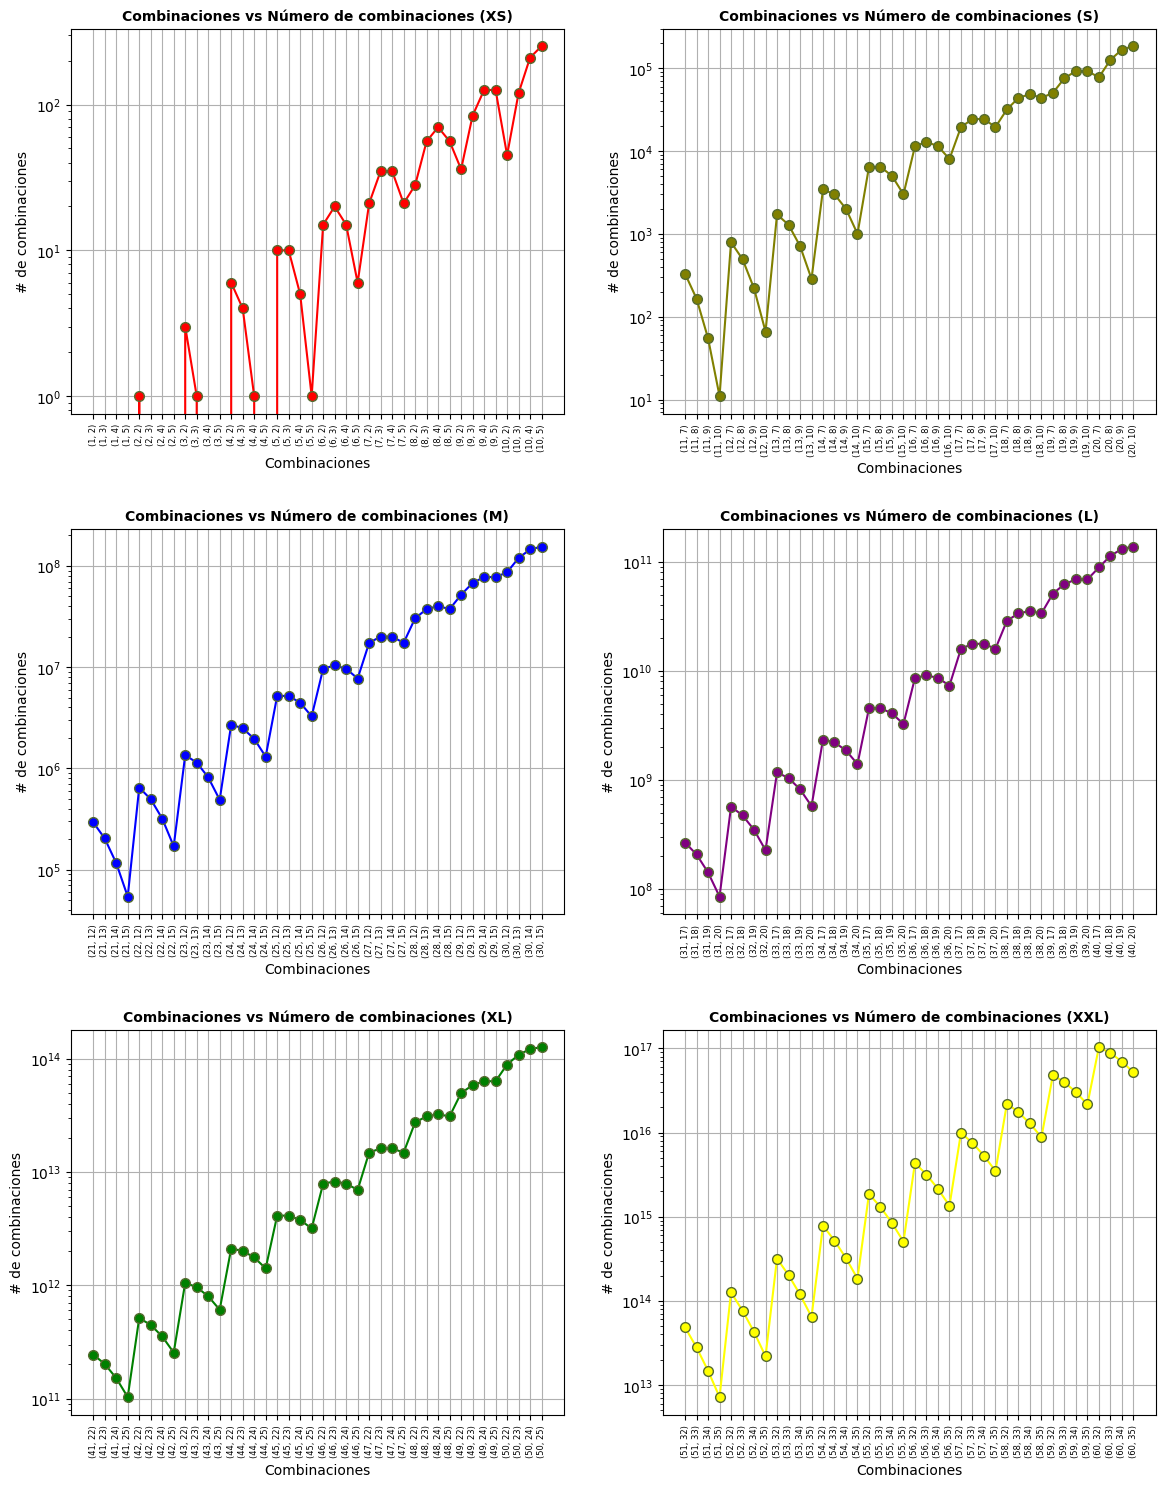

In [ ]:
metrics_combination_vs_number_combinations_memo(df_3)

In [ ]:
def metrics_combinated_memo(df):
  plt.figure(figsize=(10, 6), dpi = 115)

  plt.plot(df['XS_Combination'], df['XS_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'red', mec = 'darkolivegreen' )
  plt.plot(df['S_Combination'], df['S_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'olive', mec = 'darkolivegreen' )
  plt.plot(df['M_Combination'], df['M_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'blue', mec = 'darkolivegreen' )
  plt.plot(df['L_Combination'], df['L_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'blue', mec = 'darkolivegreen' )
  plt.plot(df['XL_Combination'], df['XL_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'green', mec = 'darkolivegreen' )
  plt.plot(df['XXL_Combination'], df['XXL_Execution_time'], marker='o', markersize = 7,  linestyle='-', c = 'yellow', mec = 'darkolivegreen' )

  plt.title('Combinaciones vs Tiempo de ejecucion', fontsize =18, fontweight = 'bold')
  plt.xlabel('Combinaciones', fontsize = 14)
  plt.ylabel('Tiempo de ejecuion (segundos)', fontsize = 14)

  plt.xticks(range(0, 240, 10), rotation=90, fontsize = 10)
  plt.yticks(fontsize = 12)
  plt.legend(['XS', 'S', 'M', 'L', 'XL', 'XXL'])

  plt.grid(True)
  plt.show()

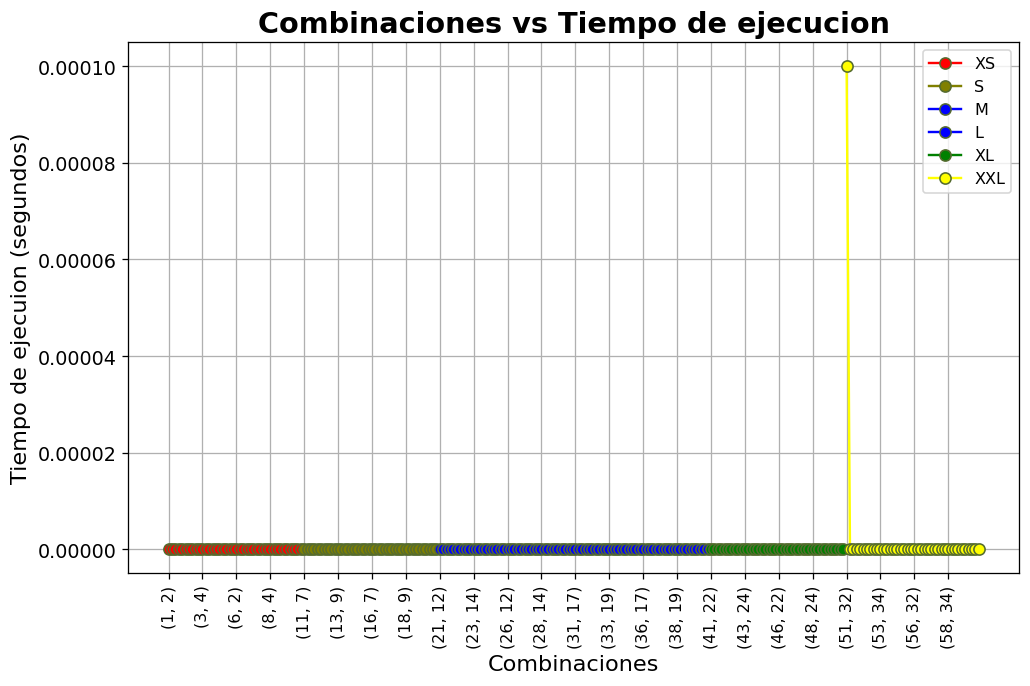

In [ ]:
metrics_combinated_memo(df_3)

## Realizamos una comparativa entre el algoritmo de divide y venceras original y su modificación con memorización

In [ ]:
""" Hacemos una copia respectiva de cada dataframe """
df_divide = df_2.copy()
df_divide_memo = df_3.copy()

In [ ]:
def compare_time_metric(df1, df2):
  plt.figure(figsize=(10, 6), dpi = 105)
  plt.scatter(df1['M_Combination'], df1['M_Execution_time'], label='Algoritmo recursivo DV', alpha=0.6, s = 50)
  plt.scatter(df2['M_Combination'], df2['M_Execution_time'], label='Algoritmo recursivo Memorización', alpha=0.6, s = 50)

  plt.title('Combinaciones vs Tiempo de ejecución (M)', fontsize = 14, fontweight = 'bold')
  plt.xlabel('Combinaciones', fontsize = 12, fontweight = 'bold')
  plt.ylabel('Tiempo (segundos)', fontsize = 12, fontweight = 'bold')

  plt.xticks(range(len(df['M_Combination'])), rotation=90, fontsize = 10)
  plt.legend()

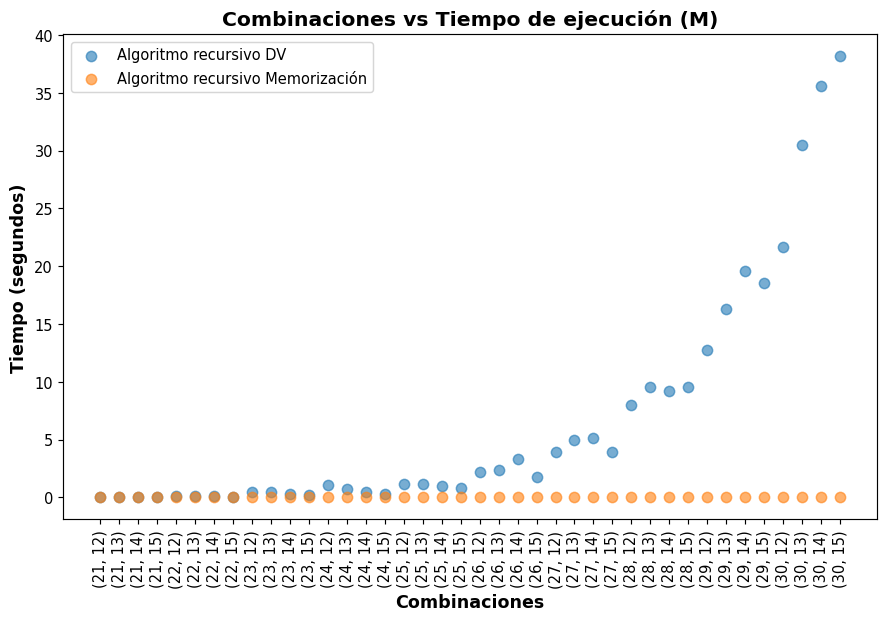

In [ ]:
compare_time_metric(df_divide, df_divide_memo)

## Algoritmo con fórmula general


### Método de la Fórmula Factorial (`binomial_formule`)

---

### Complejidad Temporal: $\mathcal{O}(n)$

El algoritmo `binomial_formule` utiliza directamente la fórmula matemática:

\begin{equation}
\binom{n}{k} = \frac{n!}{k!(n-k)!}
\end{equation}


---

**1. Cálculo de factoriales:**  
La operación dominante es el cálculo de los factoriales:

\[
n!, \quad k!, \quad (n-k)!
\]

- El cálculo de $n!$ requiere $n$ multiplicaciones.  
- El cálculo de $k!$ requiere $k$ multiplicaciones.  
- El cálculo de $(n-k)!$ requiere $(n-k)$ multiplicaciones.

---

**2. Operación del factorial en Python:**  
La función `math.factorial()` tiene una complejidad de $\mathcal{O}(n)$ para calcular $n!$.

---

### Complejidad Espacial: $\mathcal{O}(1)$

**1. Variables constantes:**  
El algoritmo solo utiliza un número constante de variables ($n$, $k$, y el resultado).

**2. Sin estructuras auxiliares:**  
No se emplean estructuras de datos adicionales que crezcan con el tamaño de la entrada.

---

### Resumen de la Complejidad Temporal: $\mathcal{O}(n)$

Esta complejidad se deriva del cálculo de los factoriales:

- $n!$ requiere $n$ multiplicaciones.  
- $k!$ requiere $k$ multiplicaciones.  
- $(n-k)!$ requiere $(n-k)$ multiplicaciones.

**Implementación de `math.factorial()`:**  
La función integrada en Python tiene una complejidad de $\mathcal{O}(n)$ para calcular el factorial de $n$.


In [ ]:
def general_formule(n, k):
    if k > n:
        return 0
    # 2. Si k = 0 o k = n, se cumple que C(n, k) = 1
    if k == 0 or k == n:
        return 1
    # Utilizamos la fórmula C(n, k) = n! / (k! * (n-k)!)
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

In [ ]:
def general_formule(n, k):
    if k > n:
        return 0
    # 2. Si k = 0 o k = n, se cumple que C(n, k) = 1
    if k == 0 or k == n:
        return 1
    # Utilizamos la fórmula C(n, k) = n! / (k! * (n-k)!)
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

"""Funcion donde se experimenta con diferentes tamaños de entradas, tiempos de ejecución  y número de combinaciones"""
def results_general_formule():

  # diccionario donde se guardaran todos los resultados
  results = {}
  # Definimos tamaños de las entradas según el caso [ [valores n], [valores k] ]
  weights = {
    'XS': [[1, 10], [2, 5]],
    'S': [[11, 20], [7, 10]],
    'M': [[21, 30], [12, 15]],
    'L': [[31, 40], [17, 20]],
    'XL': [[41, 50], [22, 25]],
    'XXL': [[51, 60], [32, 35]]
  }

  # Extraemos los valores de cada llave del diccionario para iterarlo cada combinación
  for weight, ranges in weights.items():

    # Rangos para n y k
    range_n = ranges[0] # Primer elemento de values para (n) en cada peso.  --> XS = [1, 10] | S = [11, 20] | M = [21, 30] | L = [31, 40]
    range_k = ranges[1] # Segundo elemento de values para (k) en cada peso. --> XS = [2, 5]] | S = [7, 10]  | M = [12, 15] | L = [17, 20]


    results[weight] = []

    for i in range(range_n[0], range_n[1] + 1): # for que itera desde el primer elemento de range_n hasta el ultimo
      for k in range(range_k[0], range_k[1] + 1): # for que itera desde el primer elemento de range_k hasta el ultimo

        # definimos nuestro n y k para el coeficiente binomial a calcular
        n = i
        k = k
        # definimos la combinación en una tupla
        combination = (n, k)
        print(f"Weight {weight} Combinación: {combination}")

        # Calculamos el tiempo de ejecución de la función 'binomial'
        start_time = time.time()
        result = general_formule(n, k) # Se invoca la función que realiza todo el proceso de calcular el coeficiente binomial recursivamente
        end_time = time.time()

        # definimos los tiempos de cada combinacion
        time_executed = end_time - start_time

        # Asignamos las métricas en un diccionario
        dictionary = {
          '_Combination': combination,
          '_Number_of_combinations': result,
          '_Execution_time': round(time_executed, 4)
        }
        # Guardamos cada combinacion como un diccionario y luego lo guardamos en una lista de diccionarios
        results[weight].append(dictionary)
        print(f"Número de combinaciones: {result}, Tiempo de ejecución: {time_executed}")
        print()
  return results

In [ ]:
results_formule = results_general_formule()
# Obtenemos la lista de claves de pesos (por ejemplo, ['XS', 'S', 'M', 'L'])
weights_keys_formule = list(results_formule.keys())

# Asignamos el número de filas
n_rows_formule = len(results_formule[weights_keys_formule[0]])

# Creamos la lista de nombres de columnas.
field_names_formule = []
for weight_formule in weights_keys_formule:
  field_names_formule.extend([
    f"{weight_formule}_Combination",
    f"{weight_formule}_Number_of_combinations",
    f"{weight_formule}_Execution_time"
  ])

# Abrimos el archivo CSV para escritura y construimos cada fila
with open('formule_results.csv', mode = 'w', newline = '') as file:
  writer_formule = csv.DictWriter(file, fieldnames = field_names_formule)
  writer_formule.writeheader()

  # Recorremos el índice de cada registro (fila)
  for i in range(n_rows_formule):
    row_formule = {}
    # Para cada peso, obtenemos el registro correspondiente a la posición i
    for weight_formule in weights_keys_formule:
      metric_formule = results_formule[weight_formule][i]
      row_formule[f"{weight_formule}_Combination"] = metric_formule["_Combination"]
      row_formule[f"{weight_formule}_Number_of_combinations"] = metric_formule["_Number_of_combinations"]
      row_formule[f"{weight_formule}_Execution_time"] = metric_formule["_Execution_time"]

    writer_formule.writerow(row_formule)

Weight XS Combinación: (1, 2)
Número de combinaciones: 0, Tiempo de ejecución: 1.9073486328125e-06

Weight XS Combinación: (1, 3)
Número de combinaciones: 0, Tiempo de ejecución: 7.152557373046875e-07

Weight XS Combinación: (1, 4)
Número de combinaciones: 0, Tiempo de ejecución: 4.76837158203125e-07

Weight XS Combinación: (1, 5)
Número de combinaciones: 0, Tiempo de ejecución: 2.384185791015625e-07

Weight XS Combinación: (2, 2)
Número de combinaciones: 1, Tiempo de ejecución: 4.76837158203125e-07

Weight XS Combinación: (2, 3)
Número de combinaciones: 0, Tiempo de ejecución: 4.76837158203125e-07

Weight XS Combinación: (2, 4)
Número de combinaciones: 0, Tiempo de ejecución: 9.5367431640625e-07

Weight XS Combinación: (2, 5)
Número de combinaciones: 0, Tiempo de ejecución: 9.5367431640625e-07

Weight XS Combinación: (3, 2)
Número de combinaciones: 3, Tiempo de ejecución: 3.5762786865234375e-06

Weight XS Combinación: (3, 3)
Número de combinaciones: 1, Tiempo de ejecución: 2.384185791

In [ ]:
df_4 = pd.read_csv('formule_results.csv')
df_4.head()

,XS_Combination,XS_Number_of_combinations,XS_Execution_time,S_Combination,S_Number_of_combinations,S_Execution_time,M_Combination,M_Number_of_combinations,M_Execution_time,L_Combination,L_Number_of_combinations,L_Execution_time,XL_Combination,XL_Number_of_combinations,XL_Execution_time,XXL_Combination,XXL_Number_of_combinations,XXL_Execution_time
0,"(1, 2)",0,0.0,"(11, 7)",330,0.0,"(21, 12)",293930,0.0,"(31, 17)",265182525,0.0,"(41, 22)",244662670200,0.0,"(51, 32)",48459472266975,0.0
1,"(1, 3)",0,0.0,"(11, 8)",165,0.0,"(21, 13)",203490,0.0,"(31, 18)",206253075,0.0,"(41, 23)",202112640600,0.0,"(51, 33)",27900908274925,0.0
2,"(1, 4)",0,0.0,"(11, 9)",55,0.0,"(21, 14)",116280,0.0,"(31, 19)",141120525,0.0,"(41, 24)",151584480450,0.0,"(51, 34)",14771069086725,0.0
3,"(1, 5)",0,0.0,"(11, 10)",11,0.0,"(21, 15)",54264,0.0,"(31, 20)",84672315,0.0,"(41, 25)",103077446706,0.0,"(51, 35)",7174519270695,0.0
4,"(2, 2)",1,0.0,"(12, 7)",792,0.0,"(22, 12)",646646,0.0,"(32, 17)",565722720,0.0,"(42, 22)",513791607420,0.0,"(52, 32)",125994627894135,0.0


## Algoritmo con programación dinámica

### Complejidad Temporal: $\mathcal{O}(n \cdot k)$

El algoritmo `binomial_dp` utiliza **programación dinámica** _bottom-up_ con una matriz bidimensional.

---

**1. Inicialización de la matriz:**  
Se crea una matriz de tamaño $(n+1) \times (k+1)$:  
$\mathcal{O}(n \cdot k)$ operaciones para inicializar todos los elementos a cero.

---

**2. Bucles anidados para llenar la matriz:**  
- **Bucle externo:** Itera desde $0$ hasta $n$ ($n+1$ iteraciones): $\mathcal{O}(n)$  
- **Bucle interno:** Para cada $i$, itera desde $1$ hasta $\min(i, k)$ → $\mathcal{O}(k)$ en el peor caso  
- **Operación dentro del bucle:** Cada cálculo de `dp[i][j]` se realiza en $\mathcal{O}(1)$

---

**3. Análisis detallado:**  
- Total de celdas calculadas: aproximadamente $\frac{(n+1) \cdot (k+1)}{2}$ cuando $k \leq n$  
- Cada celda requiere tiempo constante para ser calculada  
- Por tanto, la complejidad total es: $\mathcal{O}(n \cdot k)$

---

### Complejidad Espacial: $\mathcal{O}(n \cdot k)$

**1. Matriz de programación dinámica:**  
Se crea una matriz `dp` de tamaño $(n+1) \times (k+1)$, lo cual requiere $\mathcal{O}(n \cdot k)$ espacio en memoria.

---

**2. Análisis adicional:**  
A diferencia del algoritmo `binomial_dynamic` que usa una tabla unidimensional de tamaño $\mathcal{O}(k)$,  
este algoritmo utiliza una tabla **bidimensional completa**.  
No se aplica ninguna optimización para reducir el espacio requerido.





In [ ]:
"""Funcion que calcula el numero de coeficientes binomiales (n, k) mediante programación dinámica"""
def dynamic_programming(n, k):
  # Caso donde k es mayor que n, lo cual no tiene sentido en combinatoria
  if k > n:
    return 0

  # Inicializamos una tabla (lista de listas) con ceros
  # Se necesitan (n+1) filas y (k+1) columnas
  dp = [[0] * (k + 1) for _ in range(n + 1)]

  # Rellenamos la tabla iterativamente
  for i in range(n + 1):
    # Siempre hay una forma de elegir 0 elementos: C(i, 0) = 1
    dp[i][0] = 1
    #print()
    #print(f'{i}', dp)

    # Calculamos solo hasta min(i, k) ya que para j > i, C(i, j) = 0
    for j in range(1, min(i, k) + 1):
      # Si j es igual a i, solo hay una forma: C(i, i) = 1
      if j == i:
        dp[i][j] = 1
        #print('a',dp)
        #print()
      else:
        #print('b',dp)
        # Usamos la fórmula recursiva de los coeficientes binomiales
        dp[i][j] = dp[i - 1][j - 1] + dp[i - 1][j]
  # Se retorna el resultado almacenado en la posición dp[n][k]
  return dp[n][k]

In [ ]:
""""Funcion donde se experimenta con diferentes tamaños de entradas, tiempos de ejecución  y número de combinaciones"""
def divide_dp():

  # Diccionario para almacenar los resultados de cada categoría
  results = {}

  # Definición de rangos para 'n' y 'k' según el "peso" (tamaño de entrada)
  weights = {
    'XS': [[1, 10], [2, 5]],
    'S':  [[11, 20], [7, 10]],
    'M':  [[21, 30], [12, 15]],
    'L':  [[31, 40], [17, 20]],
    'XL': [[41, 50], [22, 25]],
    'XXL':[[51, 60], [32, 35]]
    }

    # Se itera sobre cada categoría de tamaño
  for weight, ranges in weights.items():

    # Extraemos los rangos para n y k
    range_n = ranges[0]  # Rango para n (ej. [1, 10] para XS)
    range_k = ranges[1]  # Rango para k (ej. [2, 5] para XS)

    # Inicializamos la lista de resultados para la categoría actual
    results[weight] = []

    # Iteramos sobre los valores de n en el rango definido
    for i in range(range_n[0], range_n[1] + 1):
      # Iteramos sobre los valores de k en el rango definido
      for j in range(range_k[0], range_k[1] + 1):
        n = i
        k = j
        combination = (n, k)
        print(f"Combinación: {combination}")

          # Se mide el tiempo de ejecución de la función 'binomial_dp'
        start_time = time.time()
        result = dynamic_programming(n, k)
        end_time = time.time()

        time_executed = end_time - start_time

          # Se guarda la información de la combinación en un diccionario
        dictionary = {
          '_Combination': combination,
          '_Number_of_combinations': result,
          '_Execution_time': round(time_executed, 4)
        }
        # Se agrega el diccionario a la lista de resultados para la categoría actual
        results[weight].append(dictionary)
        print(f"Número de combinaciones: {result}, Tiempo de ejecución: {time_executed}\n")
  return results

In [ ]:
all_results_dp = divide_dp()
# Obtenemos la lista de claves de pesos (por ejemplo, ['XS', 'S', 'M', 'L'])
weights_keys_dp = list(all_results_dp.keys())

# Asignamos el número de filas
n_rows_dp = len(all_results_dp[weights_keys_dp[0]])

# Creamos la lista de nombres de columnas.
field_names_dp = []
for weight_dp in weights_keys_dp:
  field_names_dp.extend([
    f"{weight_dp}_Combination",
    f"{weight_dp}_Number_of_combinations",
    f"{weight_dp}_Execution_time"
  ])

# Abrimos el archivo CSV para escritura y construimos cada fila
with open('dp_results.csv', mode = 'w', newline = '') as file:
  writer_dp = csv.DictWriter(file, fieldnames = field_names_dp)
  writer_dp.writeheader()

  # Recorremos el índice de cada registro (fila)
  for i in range(n_rows_dp):
    row_dp = {}
    # Para cada peso, obtenemos el registro correspondiente a la posición i
    for weight_dp in weights_keys_dp:
      metric_dp = all_results_dp[weight_dp][i]
      row_dp[f"{weight_dp}_Combination"] = metric_dp["_Combination"]
      row_dp[f"{weight_dp}_Number_of_combinations"] = metric_dp["_Number_of_combinations"]
      row_dp[f"{weight_dp}_Execution_time"] = metric_dp["_Execution_time"]

    writer_dp.writerow(row_dp)

Combinación: (1, 2)
Número de combinaciones: 0, Tiempo de ejecución: 2.1457672119140625e-06

Combinación: (1, 3)
Número de combinaciones: 0, Tiempo de ejecución: 4.76837158203125e-07

Combinación: (1, 4)
Número de combinaciones: 0, Tiempo de ejecución: 4.76837158203125e-07

Combinación: (1, 5)
Número de combinaciones: 0, Tiempo de ejecución: 2.384185791015625e-07

Combinación: (2, 2)
Número de combinaciones: 1, Tiempo de ejecución: 1.52587890625e-05

Combinación: (2, 3)
Número de combinaciones: 0, Tiempo de ejecución: 4.76837158203125e-07

Combinación: (2, 4)
Número de combinaciones: 0, Tiempo de ejecución: 9.5367431640625e-07

Combinación: (2, 5)
Número de combinaciones: 0, Tiempo de ejecución: 4.76837158203125e-07

Combinación: (3, 2)
Número de combinaciones: 3, Tiempo de ejecución: 1.71661376953125e-05

Combinación: (3, 3)
Número de combinaciones: 1, Tiempo de ejecución: 6.198883056640625e-06

Combinación: (3, 4)
Número de combinaciones: 0, Tiempo de ejecución: 4.76837158203125e-07


In [ ]:
df_5 = pd.read_csv('dp_results.csv')
df_5.head()

,XS_Combination,XS_Number_of_combinations,XS_Execution_time,S_Combination,S_Number_of_combinations,S_Execution_time,M_Combination,M_Number_of_combinations,M_Execution_time,L_Combination,L_Number_of_combinations,L_Execution_time,XL_Combination,XL_Number_of_combinations,XL_Execution_time,XXL_Combination,XXL_Number_of_combinations,XXL_Execution_time
0,"(1, 2)",0,0.0,"(11, 7)",330,0.0,"(21, 12)",293930,0.0000,"(31, 17)",265182525,0.0001,"(41, 22)",244662670200,0.0001,"(51, 32)",48459472266975,0.0002
1,"(1, 3)",0,0.0,"(11, 8)",165,0.0,"(21, 13)",203490,0.0000,"(31, 18)",206253075,0.0001,"(41, 23)",202112640600,0.0001,"(51, 33)",27900908274925,0.0002
2,"(1, 4)",0,0.0,"(11, 9)",55,0.0,"(21, 14)",116280,0.0001,"(31, 19)",141120525,0.0001,"(41, 24)",151584480450,0.0001,"(51, 34)",14771069086725,0.0002
3,"(1, 5)",0,0.0,"(11, 10)",11,0.0,"(21, 15)",54264,0.0001,"(31, 20)",84672315,0.0001,"(41, 25)",103077446706,0.0001,"(51, 35)",7174519270695,0.0002
4,"(2, 2)",1,0.0,"(12, 7)",792,0.0,"(22, 12)",646646,0.0000,"(32, 17)",565722720,0.0001,"(42, 22)",513791607420,0.0001,"(52, 32)",125994627894135,0.0002


## Gráfico de dispersión mostrando todos los algoritmos implementados con sus entradas fijas y muestra la diferencia en sus tiempos de ejecución de cada uno de ellos

In [ ]:
"""Traemos todos los dataframes generados anteriormente"""

df_itertools = df.copy()
df_divide_recursive = df_2.copy()
df_divide_memo = df_3.copy()
df_formule = df_4.copy()
df_dynamic_programming = df_5.copy()

In [ ]:
def compare_time_algorithms(df1, df2, df3, df4, df5):
  plt.figure(figsize=(10, 6), dpi = 105)
  plt.scatter(df1['M_Combination'], df1['M_Execution_time'], label='Algoritmo itertools', alpha=0.6, s = 50)
  plt.scatter(df2['M_Combination'], df2['M_Execution_time'], label='Algoritmo recursivo DV', alpha=0.6, s = 50)
  plt.scatter(df3['M_Combination'], df3['M_Execution_time'], label='Algoritmo memorización DV', alpha=0.6, s = 50)
  plt.scatter(df4['M_Combination'], df4['M_Execution_time'], label='Algoritmo fórmula general', alpha=0.6, s = 120)
  plt.scatter(df5['M_Combination'], df5['M_Execution_time'], label='Algoritmo programación dinámica', alpha=0.6, s = 50)

  plt.title('Combinaciones vs Tiempo de ejecución (M)', fontsize = 14, fontweight = 'bold')
  plt.xlabel('Combinaciones', fontsize = 12, fontweight = 'bold')
  plt.ylabel('Tiempo (segundos)', fontsize = 12, fontweight = 'bold')

  plt.xticks(range(len(df['M_Combination'])), rotation=90, fontsize = 10)
  plt.legend()

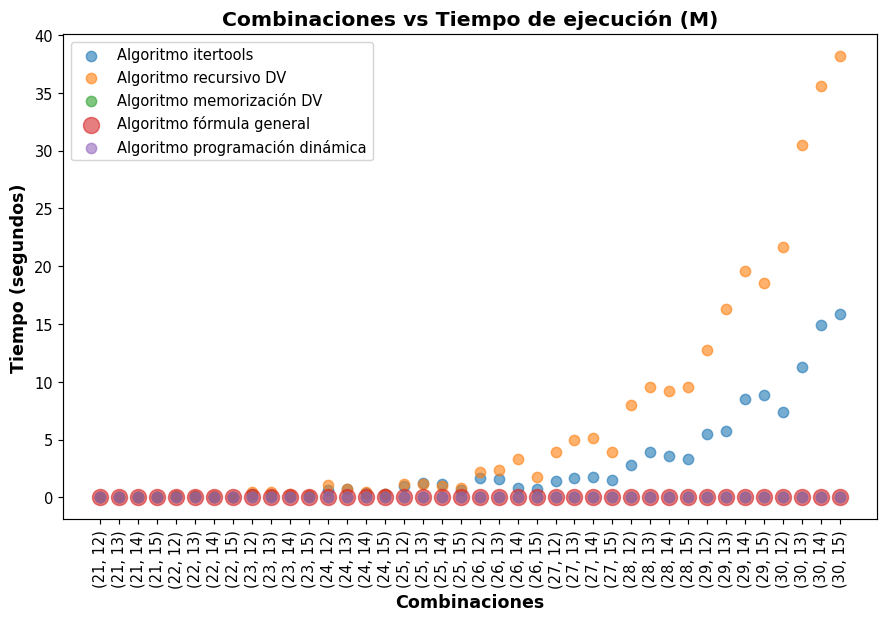

In [ ]:
compare_time_algorithms(df_itertools, df_divide_recursive, df_divide_memo, df_formule, df_dynamic_programming)

# Realizamos las pruebas de todos los algoritmos pero ahora con datos aleatorios

In [ ]:

def medir_rendimiento():
  """Función para medir y registrar métricas de rendimiento"""
  # Preparamos listas para almacenar datos
  resultados = []

  # Generamos pruebas con diferentes rangos y complejidades
  pruebas = [
    # (n_min, n_max, k_min, k_max)
    (5, 10, 1, 8),     # Rango pequeño
    (15, 25, 9, 13 ),   # Rango medio
    (13, 28, 7, 18 ),  # Rango grande
  ]

  for n_min, n_max, k_min, k_max in pruebas:
    for _ in range(50):  # 50 pruebas por rango
      n_test = random.randint(n_min, n_max)
      k_test = random.randint(k_min, k_max)

      # Medición de tiempo para método itertools
      start_time = time.time()
      resultado_itertools = brute_force_itertools(n_test, k_test)
      tiempo_itertools = time.time() - start_time

      # Medición de tiempo para método divide y venceras recursivo
      start_time = time.time()
      resultado_dv = divide_and_conquer_recursive(n_test, k_test)
      tiempo_dv = time.time() - start_time

      # Medición de tiempo para método divide y venceras con memorización
      start_time = time.time()
      resultado_dv_memo = divide_memo(n_test, k_test)
      tiempo_memo = time.time() - start_time

      # Medición de tiempo para método de fórmula general
      start_time = time.time()
      resultado_formula = general_formule(n_test, k_test)
      tiempo_formula = time.time() - start_time

      # Medición de tiempo para método programación dinámica
      start_time = time.time()
      resultado_dp = dynamic_programming(n_test, k_test)
      tiempo_dp = time.time() - start_time

      resultados.append({
        'n': n_test,
        'k': k_test,
        'resultado': resultado_dv,
        'tiempo_itertools': tiempo_itertools,
        'tiempo_dv': tiempo_dv,
        'tiempo_dv_memo': tiempo_memo,
        'tiempo_formula': tiempo_formula,
        'tiempo_dynamic_programming': tiempo_dp,
      })

  # Convertimos a DataFrame para análisis
  df = pd.DataFrame(resultados)

  # Guardamos resultados en CSV
  df.to_csv('binomial_metrics.csv', index=False)

  return df

In [ ]:
def visualizar_metricas(df):
  """Función para crear visualizaciones de las métricas"""
  plt.figure(figsize=(15, 10))

  # Gráfico 1: Tiempo de ejecución según n
  plt.subplot(2, 2, 1)
  plt.scatter(df['n'], df['tiempo_itertools'], label='Método itertools', alpha=0.6)
  plt.scatter(df['n'], df['tiempo_dv'], label='Método divide y venceras', alpha=0.6)
  plt.scatter(df['n'], df['tiempo_dv_memo'], label='Método divide y venceras con memorización', alpha=0.6)
  plt.scatter(df['n'], df['tiempo_formula'], label='Método fórmula general', alpha=0.6)
  plt.scatter(df['n'], df['tiempo_dynamic_programming'], label='Método programación dinámica', alpha=0.6)
  plt.title('Tiempo de Ejecución vs Tamaño de n')
  plt.xlabel('n')
  plt.ylabel('Tiempo (segundos)')
  plt.legend()

  # Gráfico 2: Distribución de tiempos
  plt.subplot(2, 2, 2)
  sns.boxplot(data=[df['tiempo_itertools'], df['tiempo_dv'], df['tiempo_dv_memo'], df['tiempo_formula'], df['tiempo_dynamic_programming']])
  plt.title('Distribución de Tiempos de Ejecución')
  plt.xticks([0, 1, 2, 3, 4], ['Itertools', 'DV', 'DV_memo','formula', 'dynamic_programming'])
  plt.ylabel('Tiempo (segundos)')

  # Gráfico 3: Relación entre n, k y tiempo
  plt.subplot(2, 2, 3)
  sc = plt.scatter(df['n'], df['k'], c=df['tiempo_dv'], cmap='viridis')
  plt.colorbar(sc, label='Tiempo (dv)')
  plt.title('Complejidad: n, k y Tiempo')
  plt.xlabel('n')
  plt.ylabel('k')

  # Gráfico 4: Comparación de métodos
  plt.subplot(2, 2, 4)
  speed_up = df['tiempo_dv'] / df['tiempo_dv_memo']
  plt.hist(speed_up, bins=20, edgecolor='black')
  plt.title('Speed-up (dv vs dv memo)')
  plt.xlabel('Tiempo dv / Tiempo dv_memo')
  plt.ylabel('Frecuencia')

  plt.tight_layout()
  plt.show


In [ ]:
data = medir_rendimiento()

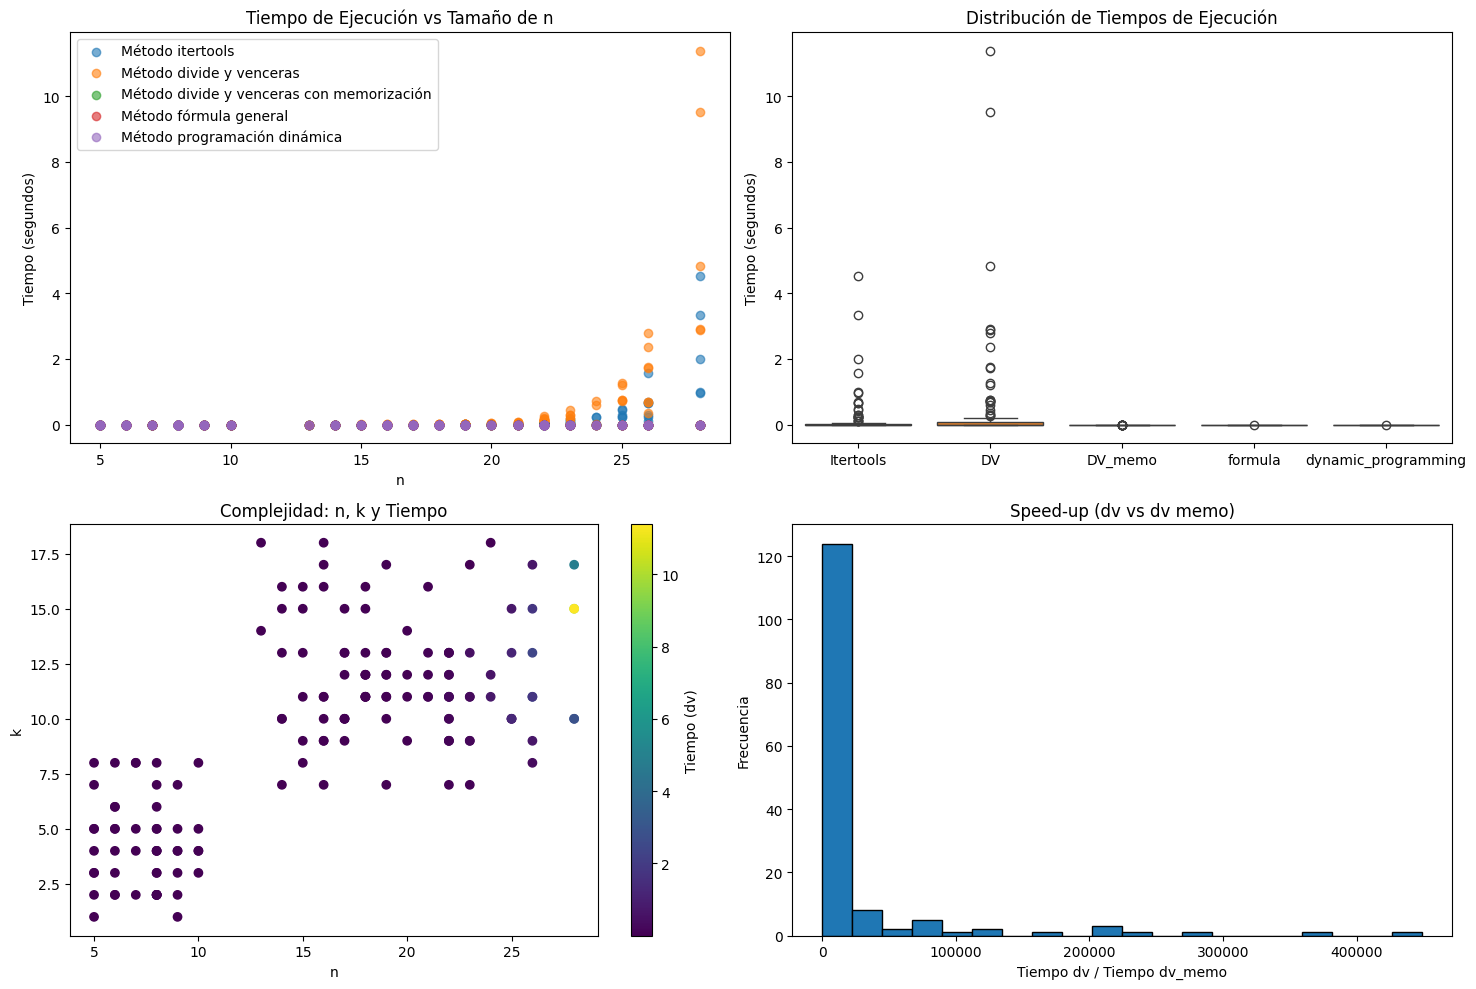

In [ ]:
visualizar_metricas(data)

# Comparación de Eficiencia entre Algoritmos para Coeficientes Binomiales

## Comparación de Implementaciones para el Cálculo de Coeficientes Binomiales

Al comparar las diferentes implementaciones para el cálculo de coeficientes binomiales, podemos establecer la siguiente **jerarquía de eficiencia**:

---

### 🧮 Algoritmo Recursivo Puro

- **Complejidad Temporal:** $\mathcal{O}(2^n)$ — Exponencial  
- **Complejidad Espacial:** $\mathcal{O}(n)$ — Lineal  
- **Eficiencia:** La menos eficiente de todas las implementaciones  
- **Limitaciones:** Solo viable para valores muy pequeños de $n$ ($n < 20$)  
- **Ventajas:** Implementación intuitiva y directa del concepto matemático

---

### 🔁 Algoritmo Recursivo con Memoización

- **Complejidad Temporal:** $\mathcal{O}(n \cdot k)$ — Polinómica  
- **Complejidad Espacial:** $\mathcal{O}(n \cdot k)$ — Polinómica  
- **Eficiencia:** Mejora drástica respecto al recursivo puro  
- **Limitaciones:** Requiere espacio adicional para almacenar resultados intermedios  
- **Ventajas:** Mantiene la claridad del enfoque recursivo eliminando cálculos redundantes

---

### ✳️ Algoritmo con Fórmula Factorial

- **Complejidad Temporal:** $\mathcal{O}(n)$ — Lineal  
- **Complejidad Espacial:** $\mathcal{O}(1)$ — Constante  
- **Eficiencia:** Excelente para valores pequeños y medianos  
- **Limitaciones:** Susceptible a **desbordamientos aritméticos** para $n$ moderadamente grandes  
- **Ventajas:** Implementación extremadamente concisa y uso mínimo de memoria

---

### 🧩 Programación Dinámica Bidimensional

- **Complejidad Temporal:** $\mathcal{O}(n \cdot k)$ — Polinómica  
- **Complejidad Espacial:** $\mathcal{O}(n \cdot k)$ — Polinómica  
- **Eficiencia:** Buena eficiencia temporal y fácil de entender  
- **Limitaciones:** Mayor consumo de memoria que otras alternativas optimizadas  
- **Ventajas:** Claridad conceptual y acceso a toda la tabla de valores intermedios

---

### 📈 Programación Dinámica Unidimensional

- **Complejidad Temporal:** $\mathcal{O}(n \cdot k)$ — Polinómica  
- **Complejidad Espacial:** $\mathcal{O}(k)$ — Lineal en $k$  
- **Eficiencia:** La **mejor relación eficiencia-memoria**  
- **Limitaciones:** Ligeramente más compleja de implementar  
- **Ventajas:** Estabilidad numérica, manejo de valores grandes y uso óptimo de memoria

---

## ✅ Conclusión sobre Eficiencia

Para **aplicaciones prácticas**, la **programación dinámica unidimensional** ofrece el **mejor equilibrio** entre eficiencia computacional y uso de memoria, siendo capaz de manejar valores grandes de $n$ y $k$ sin problemas de desbordamiento.

El **método factorial** es preferible para valores **pequeños** debido a su simplicidad y velocidad,  
mientras que los enfoques **recursivos puro y con memoización** sirven principalmente como **ilustraciones didácticas** de la evolución algorítmica.

---

La **elección óptima** dependerá del contexto específico de aplicación, los rangos típicos de valores de entrada,  
y las restricciones de memoria del sistema. Para **cálculos intensivos** o aplicaciones que requieren **alta escalabilidad**,  
las implementaciones de **programación dinámica optimizadas** (especialmente la versión **unidimensional**) son claramente superiores.


# Conclusión sobre Algoritmos para el Cálculo de Coeficientes Binomiales

### Conclusiones sobre la Eficiencia en el Cálculo de Coeficientes Binomiales

---

Tras analizar diferentes implementaciones para el cálculo de coeficientes binomiales, podemos extraer importantes conclusiones sobre la **eficiencia algorítmica** y sus implicaciones prácticas.

Los algoritmos estudiados representan un claro ejemplo de cómo diferentes estrategias de programación pueden afectar drásticamente el **rendimiento computacional** al resolver un mismo problema:

- La **implementación recursiva pura** exhibe una complejidad temporal **exponencial**:  
  $\mathcal{O}(2^n)$ en tiempo y $\mathcal{O}(n)$ en espacio,  
  lo que la hace impráctica para valores moderadamente grandes.

- En contraste, la incorporación de técnicas de **memoización** transforma la complejidad a:  
  $\mathcal{O}(n \cdot k)$ tanto en **tiempo** como en **espacio**,  
  permitiendo manejar entradas considerablemente mayores.

- El enfoque de **programación dinámica bidimensional**, aunque mantiene la misma complejidad temporal $\mathcal{O}(n \cdot k)$,  
  **utiliza más memoria** que su contraparte unidimensional.

- Por otro lado, el método basado en **factoriales** ofrece una implementación concisa con complejidad temporal $\mathcal{O}(n)$,  
  pero **sufre limitaciones prácticas** debido a posibles **desbordamientos aritméticos**.

Esta progresión de algoritmos ilustra perfectamente el clásico **compromiso entre tiempo y espacio** en la ciencia de la computación,  
así como la importancia de seleccionar la implementación adecuada según el contexto de aplicación:

- Para entradas **pequeñas**, la **simplicidad del enfoque factorial** puede ser preferible.  
- Para cálculos con **valores grandes**, las implementaciones de **programación dinámica optimizadas** resultan indispensables.

---

### Reflexión Final

El estudio de estos algoritmos no solo proporciona soluciones eficientes para el cálculo de coeficientes binomiales,  
sino que también demuestra **principios fundamentales del diseño de algoritmos**:

- Identificación de **subproblemas**  
- Eliminación de **cálculos redundantes**  
- Optimización de **recursos computacionales**
